# Data Loading

In [ ]:
import pandas as pd
import numpy as np
import random

# Set seeds
np.random.seed(42)
random.seed(42)

df = pd.read_excel('DIB dataset and codebook.xlsx')

# Class Conversion
## (Add all the target columns and save the values in another column)
## (Convert those values between 0 and 1)
## (If <= 0.5, assign 0, otherwise assign 1)
## This will be our target column

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe and it already contains the OS columns

# Step 1: Add all the OS columns
df['Occupational_Stress_Sum'] = df[['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8',
                                    'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14',
                                    'OS15', 'OS16', 'OS17', 'OS18', 'OS19',
                                    'OS20', 'OS21', 'OS22', 'OS23',
                                    'OS24', 'OS25', 'OS26', 'OS27', 'OS28',
                                    'OS29', 'OS30', 'OS31',
                                    'OS32', 'OS33', 'OS34', 'OS35',
                                    'OS36', 'OS37', 'OS38', 'OS39',
                                    'OS40', 'OS41']].sum(axis=1)

# Step 2: Normalize the summed values between 0 and 1
scaler = MinMaxScaler()
df['Occupational_Stress_Normalized'] = scaler.fit_transform(df[['Occupational_Stress_Sum']])

# Step 3: Assign 0 or 1 based on the condition
df['Occupational_Stress_Target'] = df['Occupational_Stress_Normalized'].apply(lambda x: 0 if x <= 0.5 else 1)

# Optional: You might want to drop the intermediate columns if they are not needed
# df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])



In [ ]:
df.drop(columns=['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41'], inplace=True)
df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])

In [ ]:
df.head()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,Occupational_Stress_Target
0,2,1,1,1,1,1,6,1,4,7,...,4,4,4,4,4,4,2,5,5,1
1,2,1,1,1,2,1,6,1,3,4,...,3,5,5,5,5,4,5,5,5,1
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,1
3,3,1,1,2,1,2,5,1,5,10,...,5,5,5,2,2,2,4,5,5,1
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,1


In [ ]:
df.tail()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,Occupational_Stress_Target
304,4,1,1,2,2,2,6,1,5,7,...,4,4,4,5,5,5,5,5,5,1
305,2,1,1,1,2,2,9,1,5,8,...,2,2,2,4,4,2,4,4,4,0
306,2,1,1,1,3,1,6,1,5,2,...,4,5,4,5,5,5,5,5,5,1
307,3,1,1,2,1,3,5,1,5,2,...,2,2,2,4,4,4,4,4,5,0
308,2,1,1,1,2,1,6,1,5,6,...,4,4,4,4,4,4,5,5,5,0


# Data Inspection (Statistical)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame after loading the data and preprocessing the target column

# Step 1: Basic Structure
print("DataFrame Shape (Rows, Columns):", df.shape)
print("\nFirst 5 Rows of DataFrame:")
print(df.head())

DataFrame Shape (Rows, Columns): (309, 54)

First 5 Rows of DataFrame:
   Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3  

In [ ]:
# Step 2: Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
              Age    Religion   Ethnicity  Marital status  Marriage period  \
count  309.000000  309.000000  309.000000      309.000000       309.000000   
mean     2.165049    1.084142    1.129450        1.100324         1.883495   
std      0.604589    0.433246    0.560676        0.300918         0.772510   
min      1.000000    1.000000    1.000000        1.000000         1.000000   
25%      2.000000    1.000000    1.000000        1.000000         1.000000   
50%      2.000000    1.000000    1.000000        1.000000         2.000000   
75%      2.000000    1.000000    1.000000        1.000000         2.000000   
max      5.000000    4.000000    5.000000        2.000000         3.000000   

       No. of children  Educational level  Employment status  Working period  \
count       309.000000         309.000000         309.000000      309.000000   
mean          1.323625           6.019417           1.042071        4.433657   
std       

In [ ]:
# Step 3: Data Types
print("\nData Types of Each Column:")
print(df.dtypes)



Data Types of Each Column:
Age                           int64
Religion                      int64
Ethnicity                     int64
Marital status                int64
Marriage period               int64
No. of children               int64
Educational level             int64
Employment status             int64
Working period                int64
Household income              int64
Sperm quality                 int64
JS1                           int64
JS2                           int64
JS3                           int64
JS4                           int64
JS5                           int64
JS6                           int64
JS7                           int64
JS8                           int64
JS9                           int64
JS10                          int64
JS11                          int64
JS12                          int64
JS13                          int64
JS14                          int64
JS15                          int64
JS16                          int64


In [ ]:
# Step 4: Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                           0
Religion                      0
Ethnicity                     0
Marital status                0
Marriage period               0
No. of children               0
Educational level             0
Employment status             0
Working period                0
Household income              0
Sperm quality                 0
JS1                           0
JS2                           0
JS3                           0
JS4                           0
JS5                           0
JS6                           0
JS7                           0
JS8                           0
JS9                           0
JS10                          0
JS11                          0
JS12                          0
JS13                          0
JS14                          0
JS15                          0
JS16                          0
JS17                          0
JS18                          0
JS19                          0
JS20    

In [ ]:
# Step 5: Unique Values in Each Column (Especially useful for categorical data)
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())


Number of Unique Values in Each Column:
Age                            5
Religion                       4
Ethnicity                      5
Marital status                 2
Marriage period                3
No. of children                3
Educational level              8
Employment status              3
Working period                 5
Household income              10
Sperm quality                  8
JS1                            5
JS2                            5
JS3                            5
JS4                            5
JS5                            5
JS6                            5
JS7                            5
JS8                            5
JS9                            5
JS10                           5
JS11                           5
JS12                           5
JS13                           5
JS14                           5
JS15                           5
JS16                           5
JS17                           5
JS18                           5
JS

In [ ]:
# Replace 'CATEGORICAL_COLUMN' with your actual categorical column names
for column in ['Religion', 'Ethnicity', 'Marital status']:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())


Value Counts for Religion:
Religion
1    297
3      8
4      3
2      1
Name: count, dtype: int64

Value Counts for Ethnicity:
Ethnicity
1    291
3     10
2      3
4      3
5      2
Name: count, dtype: int64

Value Counts for Marital status:
Marital status
1    278
2     31
Name: count, dtype: int64


# Exploratory Data Analysis (Later)

# Data Splitting

In [ ]:
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Split the data into training and test sets
# Let's separate features and target for splitting; replace 'YourFeatures' & 'Occupational_Stress_Target' with actual column names
X = df.drop(['Occupational_Stress_Target'], axis=1)  # Features
y = df['Occupational_Stress_Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42) #31 diye run #manual seed diye run


# Normalization

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Handle Outliers(Mean)

Age - Number of Outliers: 0


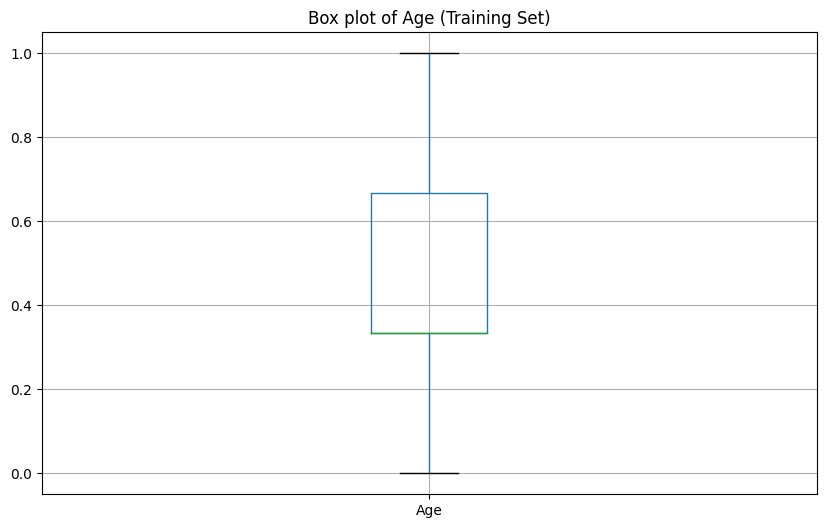

Religion - Number of Outliers: 11


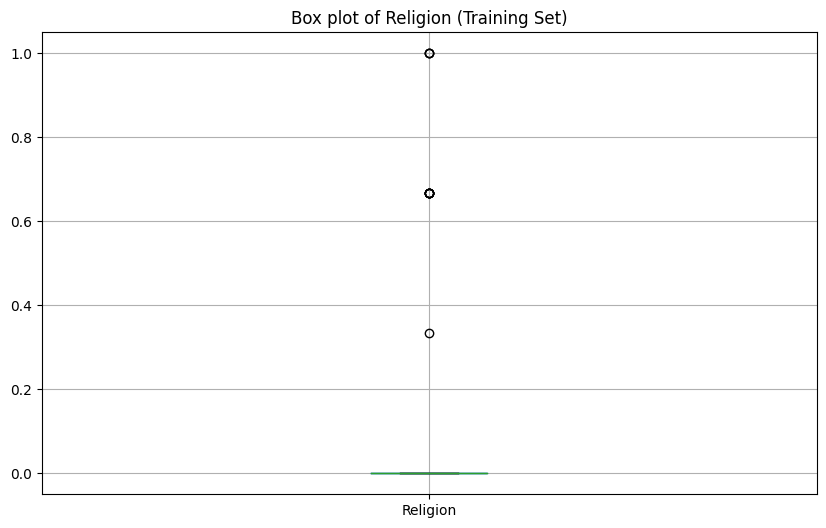

Ethnicity - Number of Outliers: 16


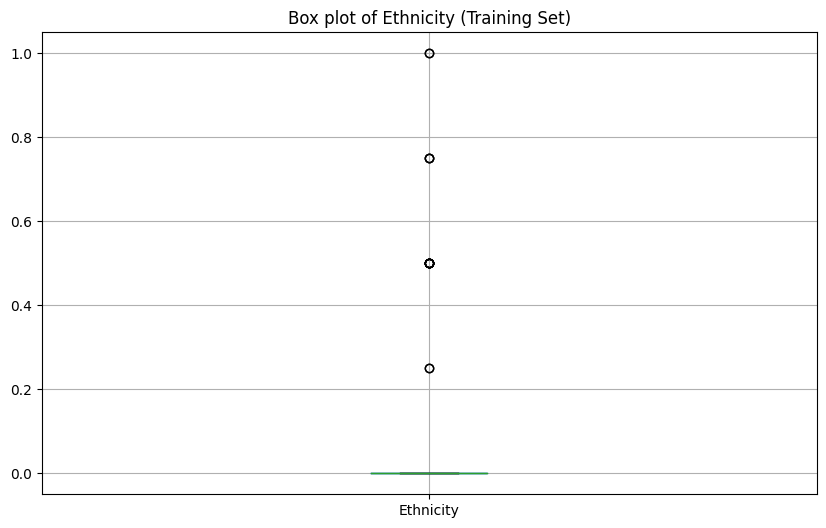

Marital status - Number of Outliers: 25


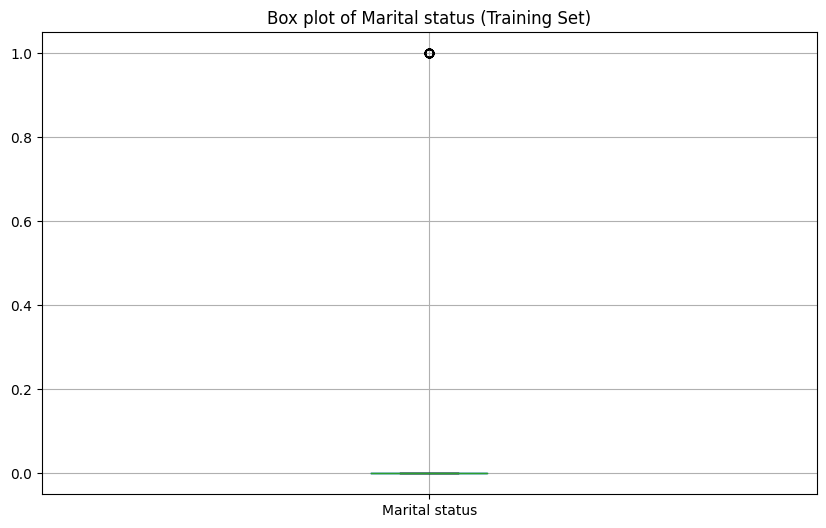

Marriage period - Number of Outliers: 0


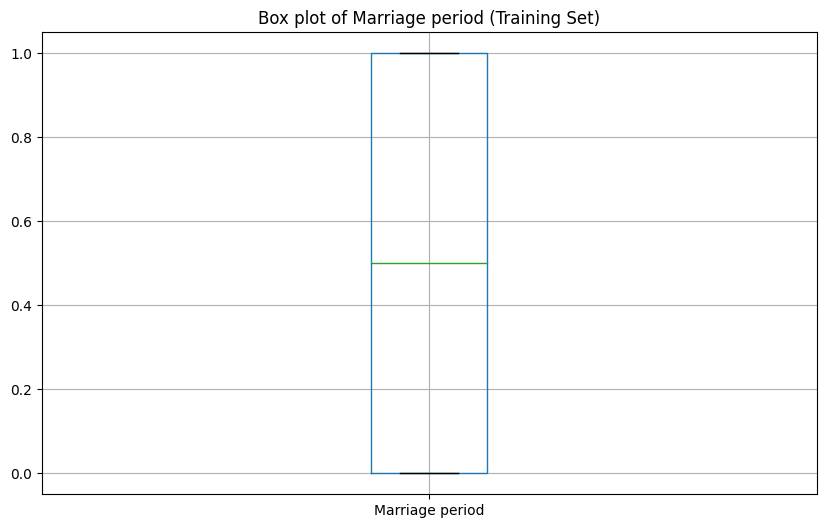

No. of children - Number of Outliers: 0


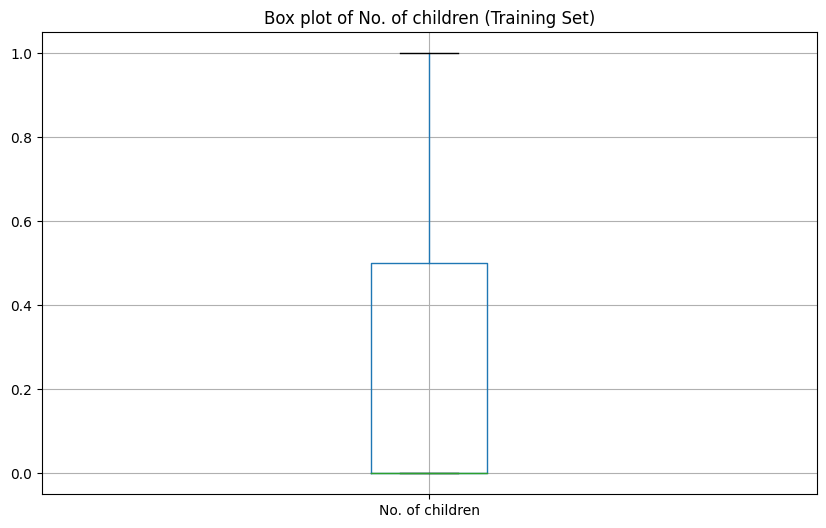

Educational level - Number of Outliers: 0


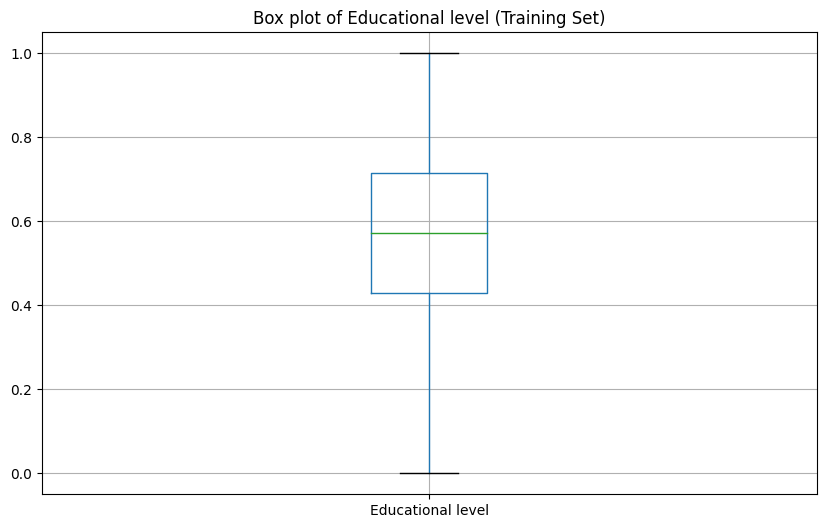

Employment status - Number of Outliers: 8


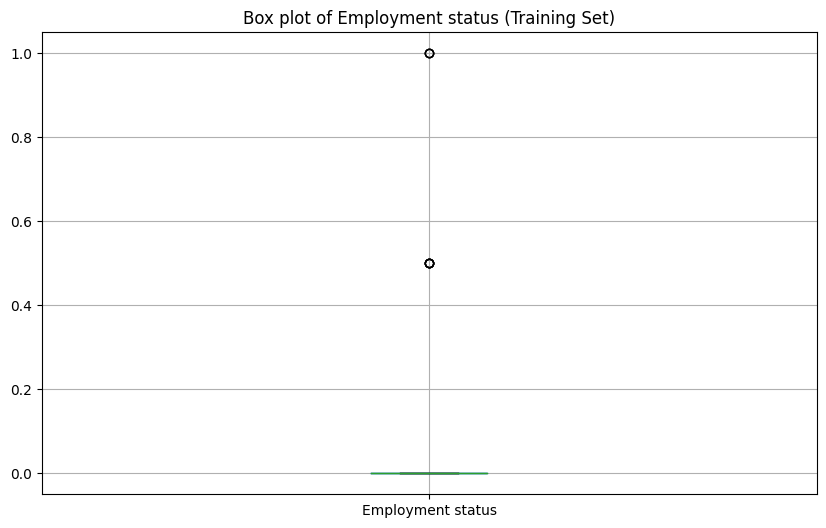

Working period - Number of Outliers: 13


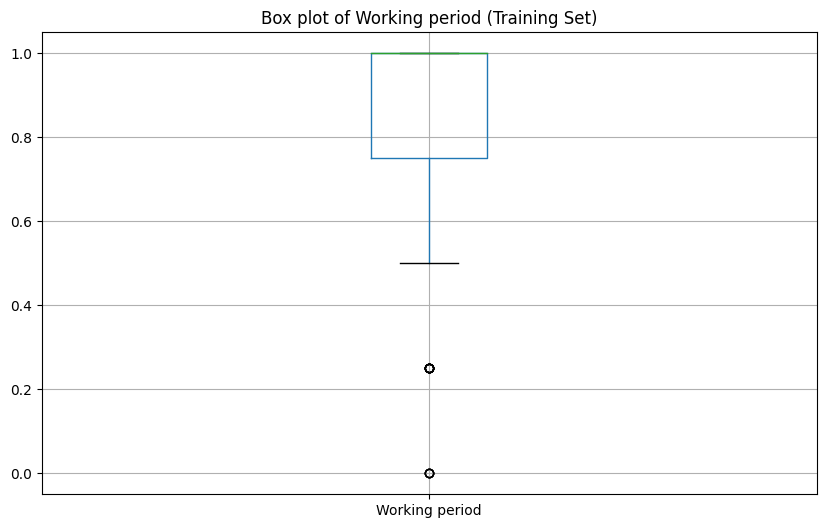

Household income - Number of Outliers: 0


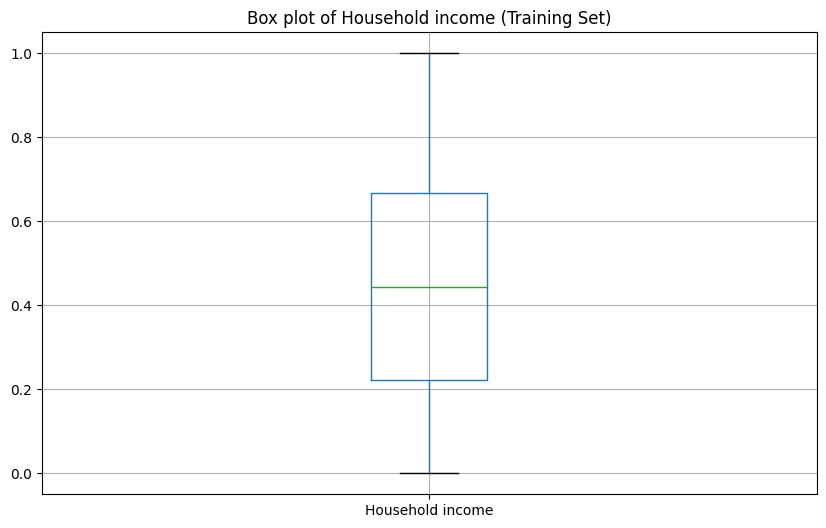

Sperm quality - Number of Outliers: 29


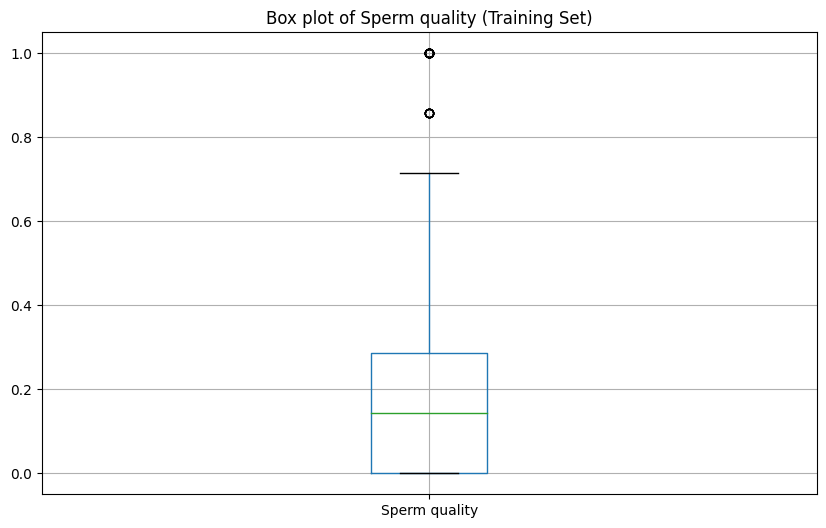

JS1 - Number of Outliers: 19


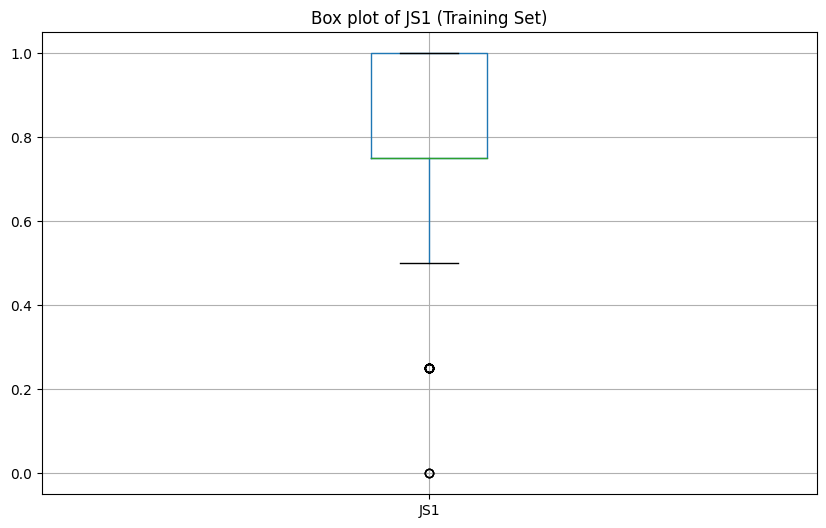

JS2 - Number of Outliers: 0


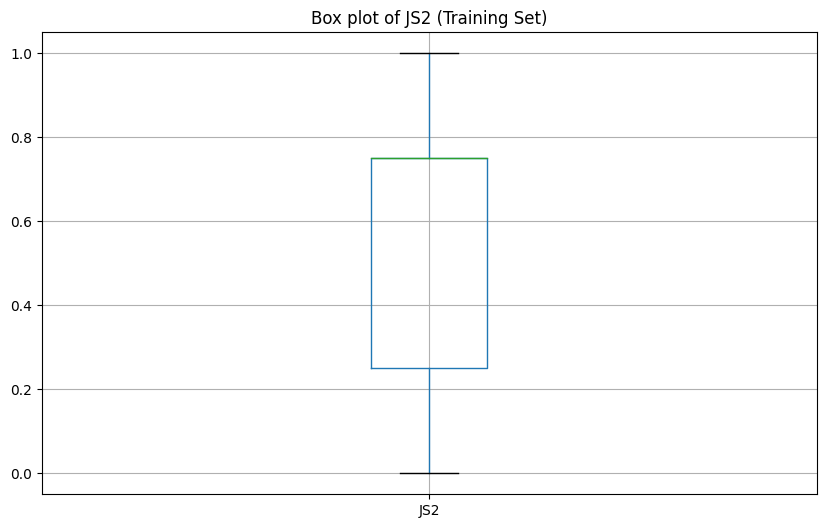

JS3 - Number of Outliers: 0


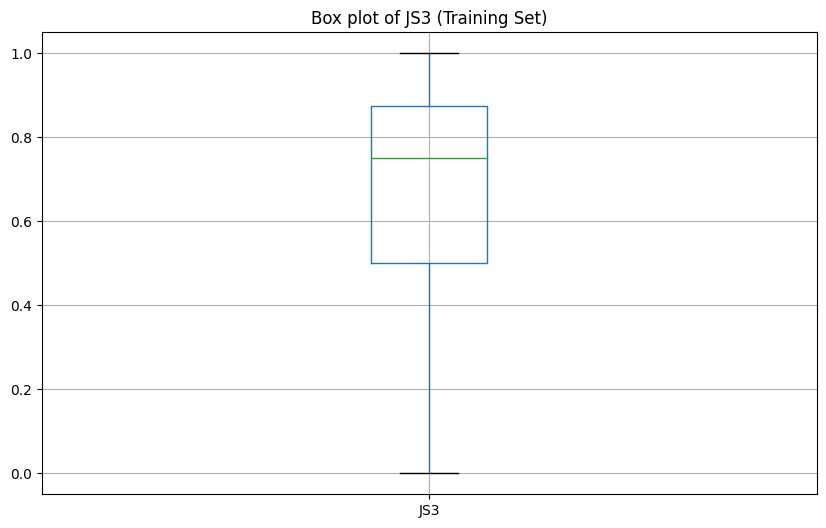

JS4 - Number of Outliers: 9


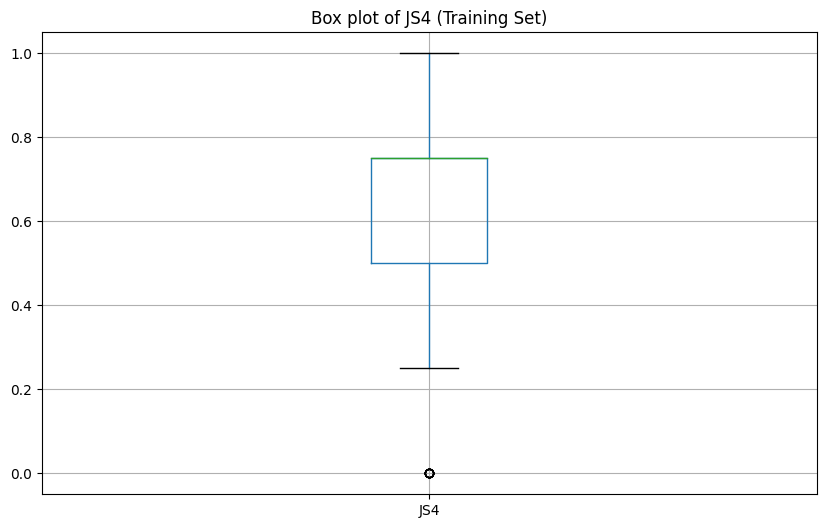

JS5 - Number of Outliers: 0


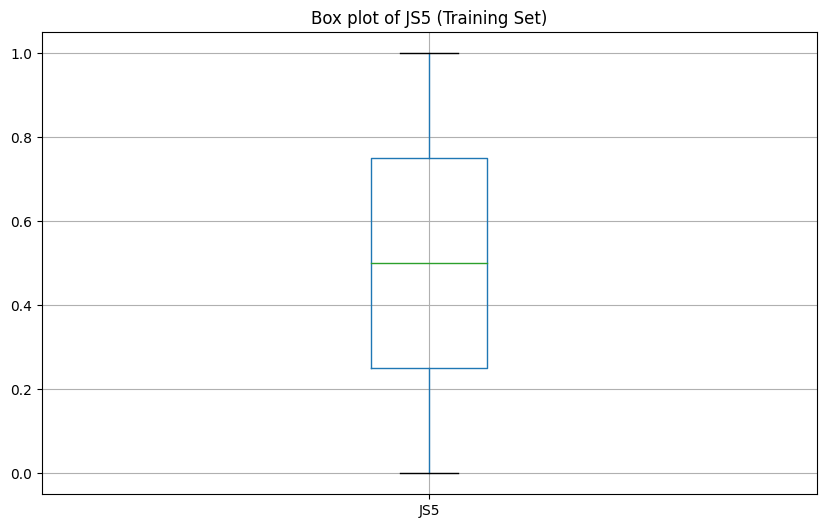

JS6 - Number of Outliers: 10


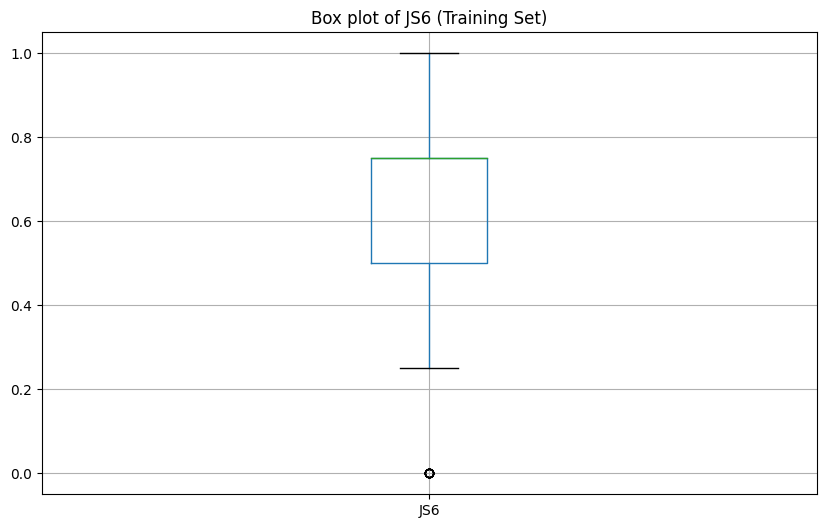

JS7 - Number of Outliers: 0


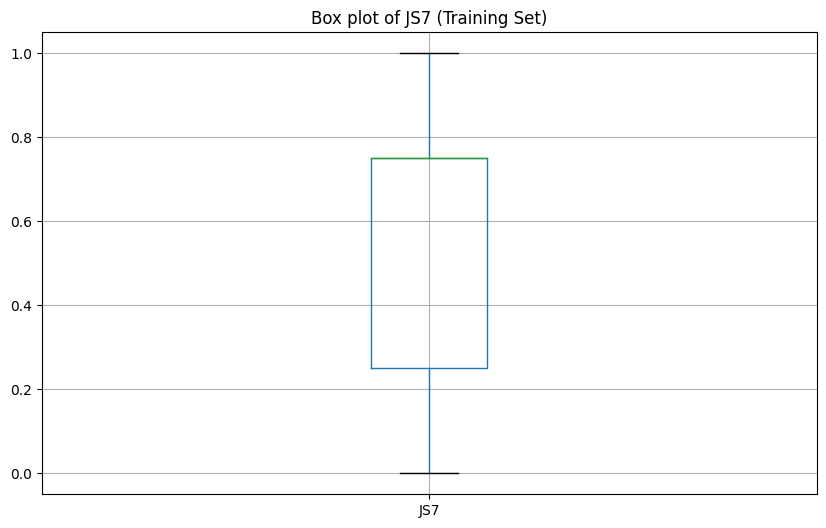

JS8 - Number of Outliers: 3


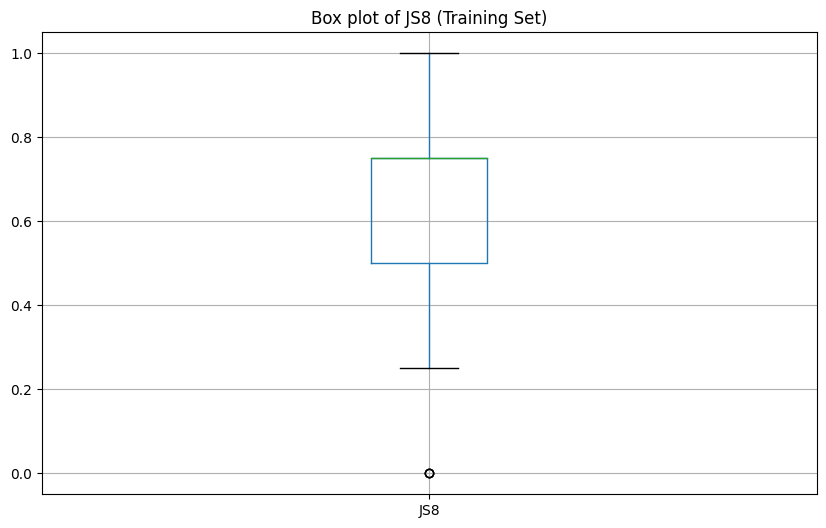

JS9 - Number of Outliers: 103


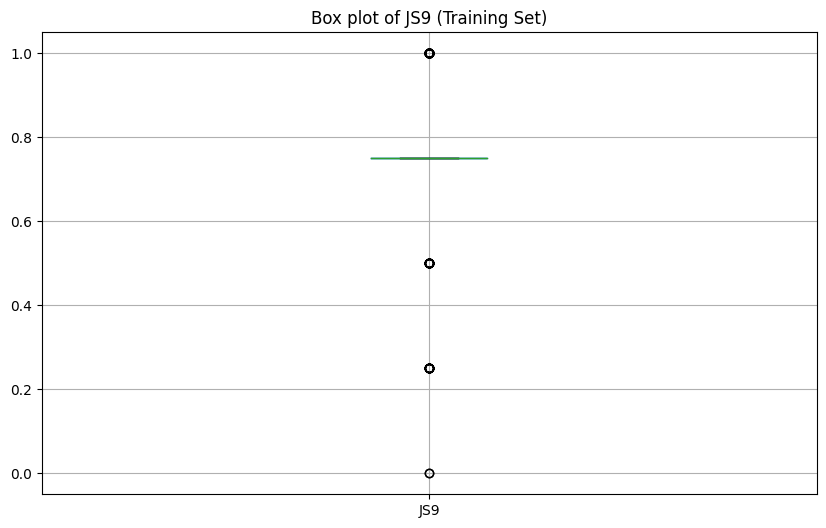

JS10 - Number of Outliers: 25


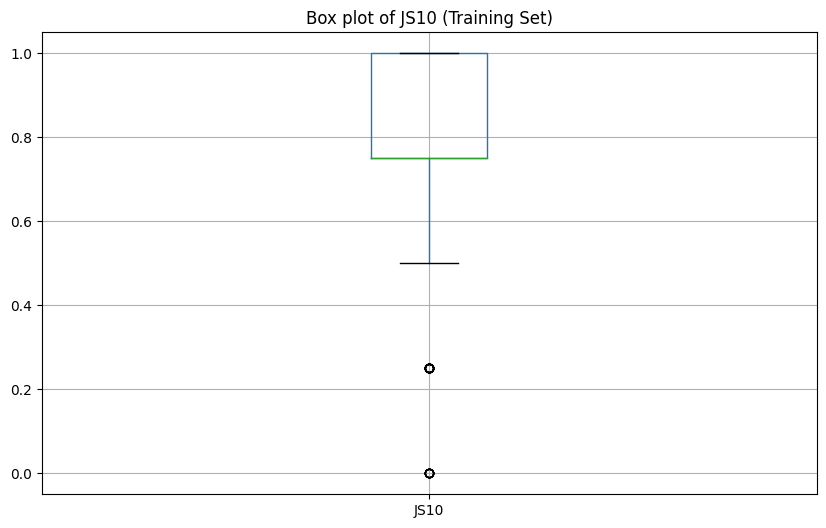

JS11 - Number of Outliers: 8


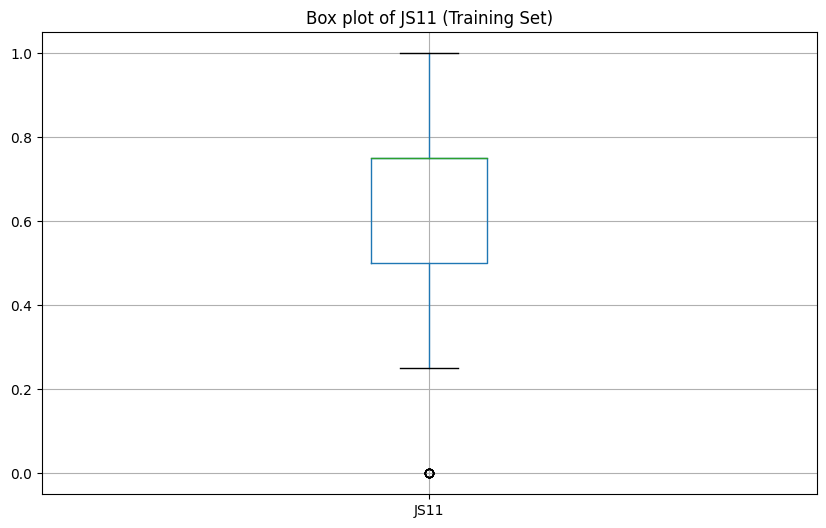

JS12 - Number of Outliers: 8


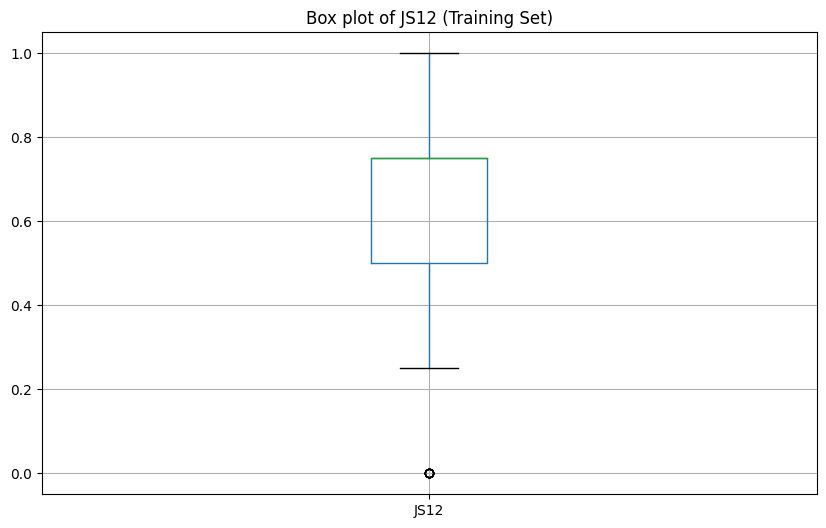

JS13 - Number of Outliers: 6


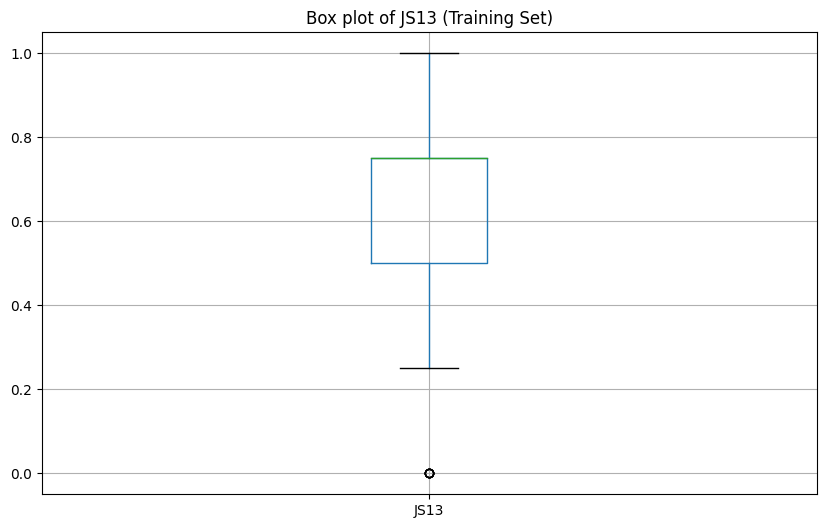

JS14 - Number of Outliers: 6


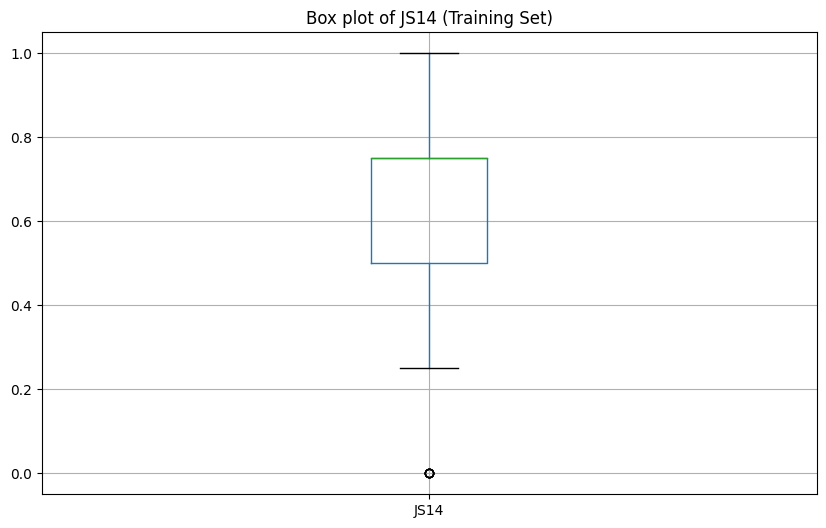

JS15 - Number of Outliers: 0


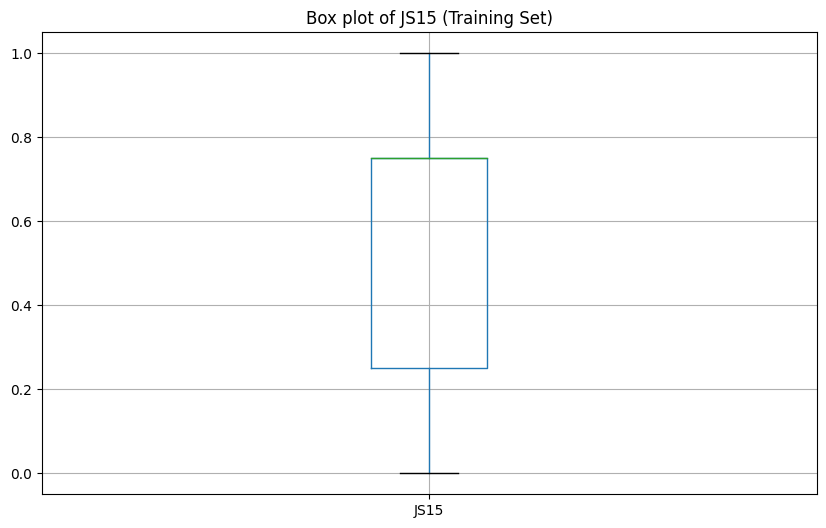

JS16 - Number of Outliers: 8


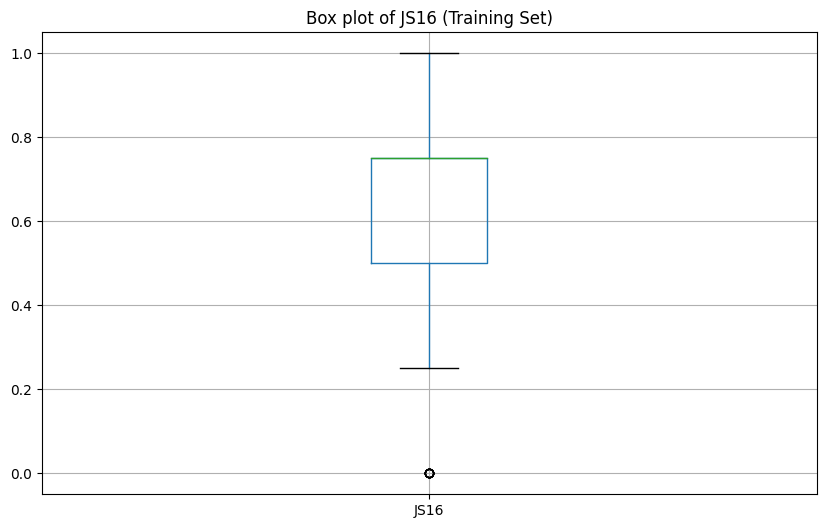

JS17 - Number of Outliers: 3


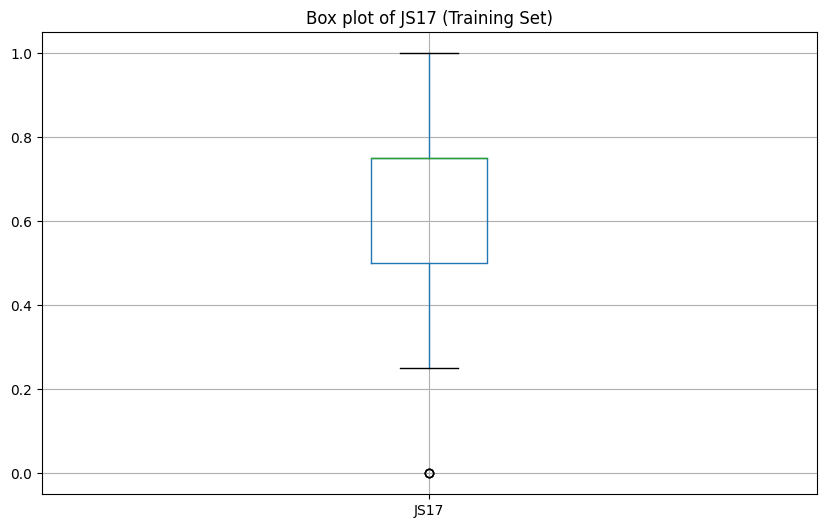

JS18 - Number of Outliers: 17


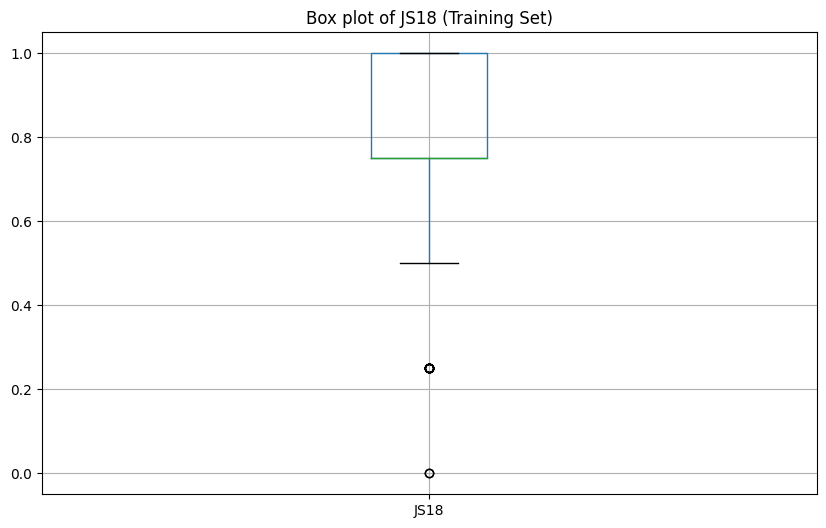

JS19 - Number of Outliers: 4


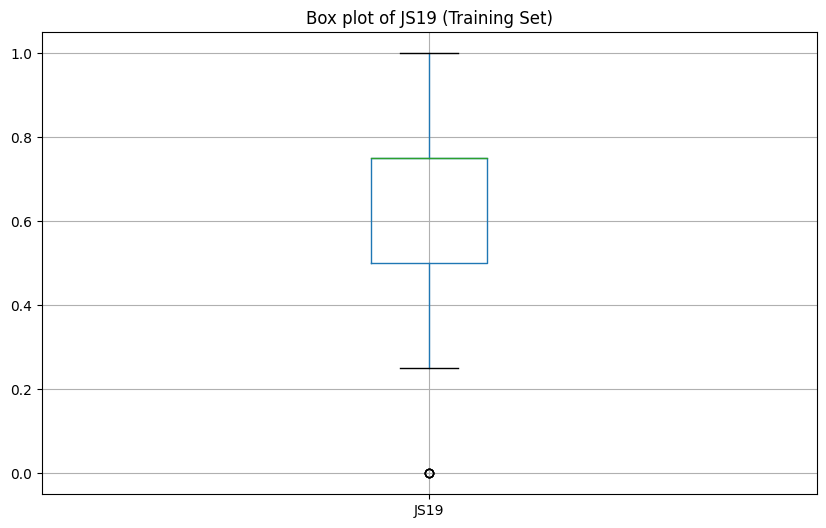

JS20 - Number of Outliers: 4


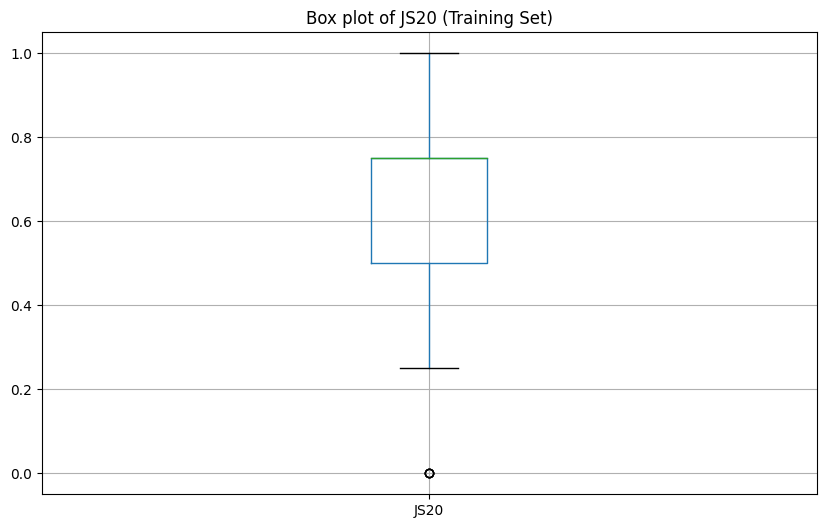

JS21 - Number of Outliers: 0


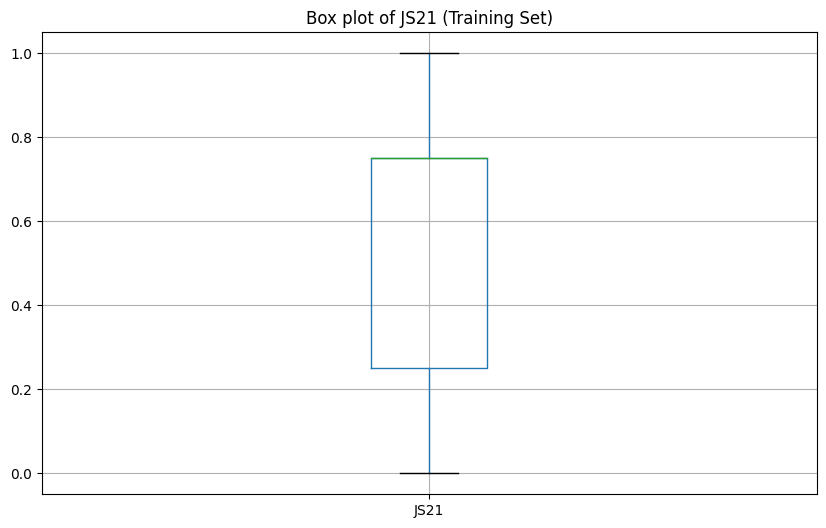

JS22 - Number of Outliers: 0


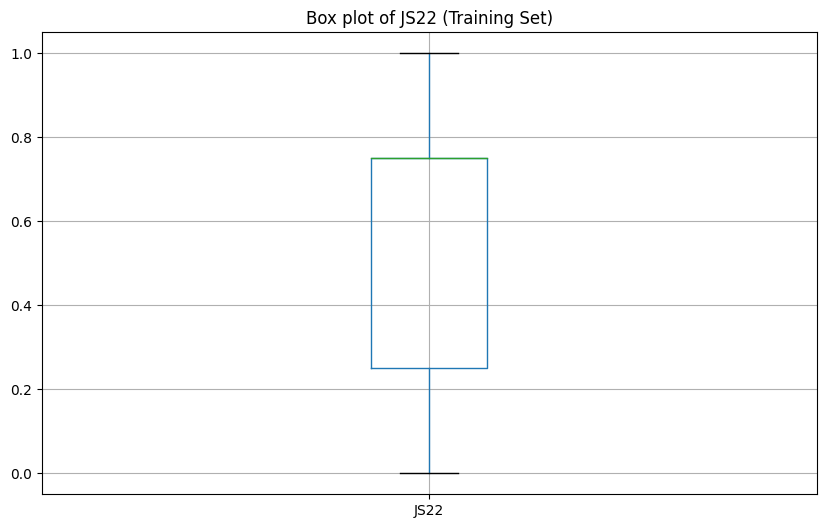

JS23 - Number of Outliers: 0


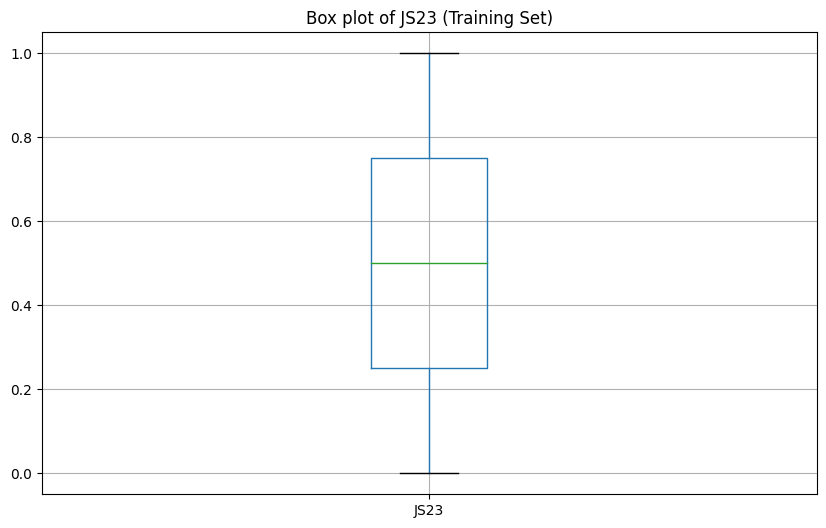

JS24 - Number of Outliers: 0


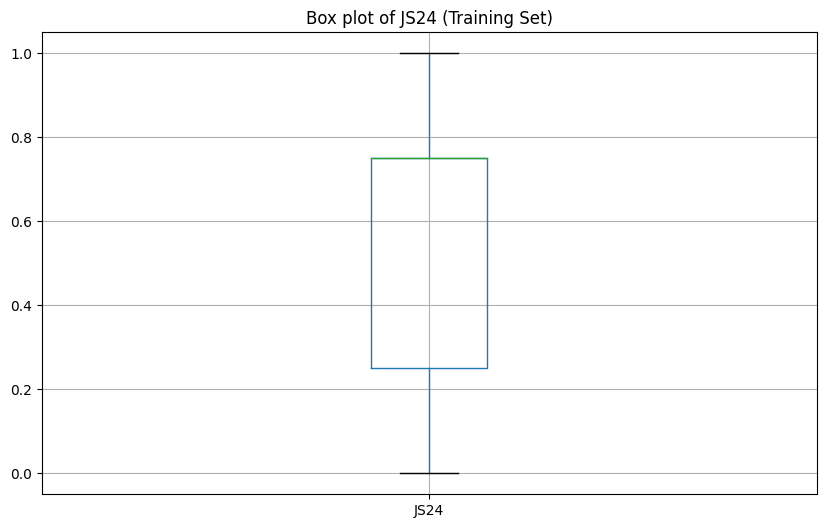

JS25 - Number of Outliers: 8


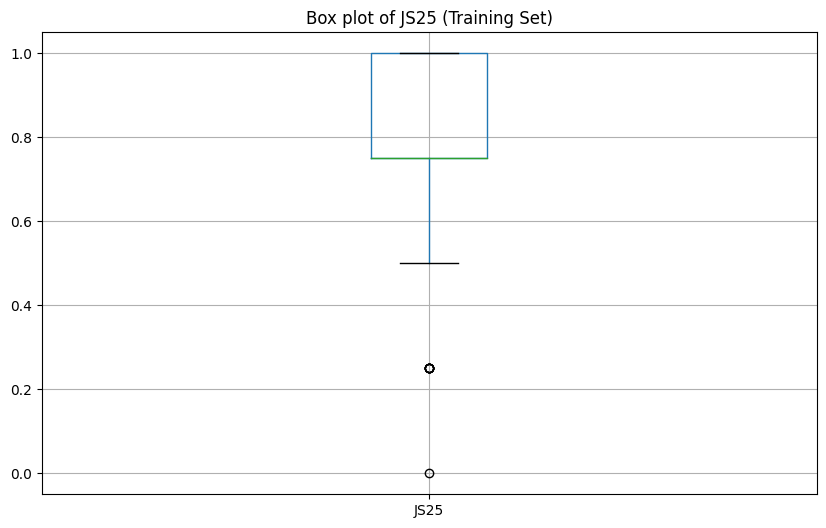

JS26 - Number of Outliers: 8


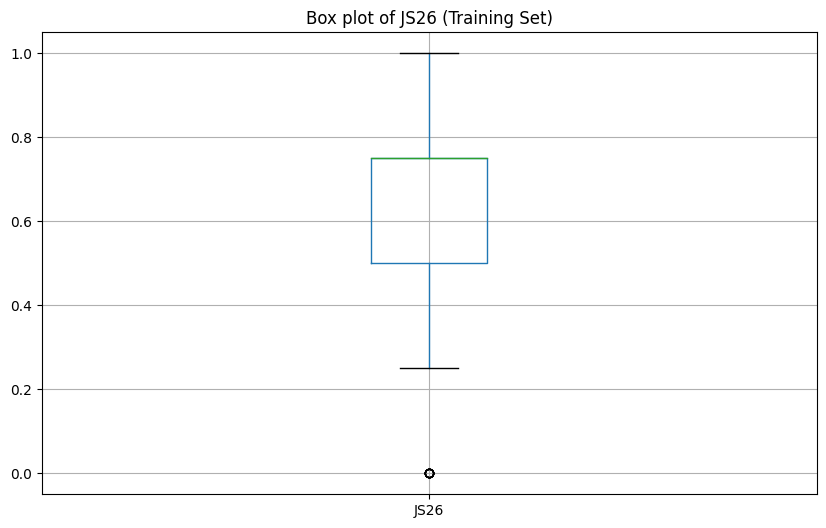

JS27 - Number of Outliers: 92


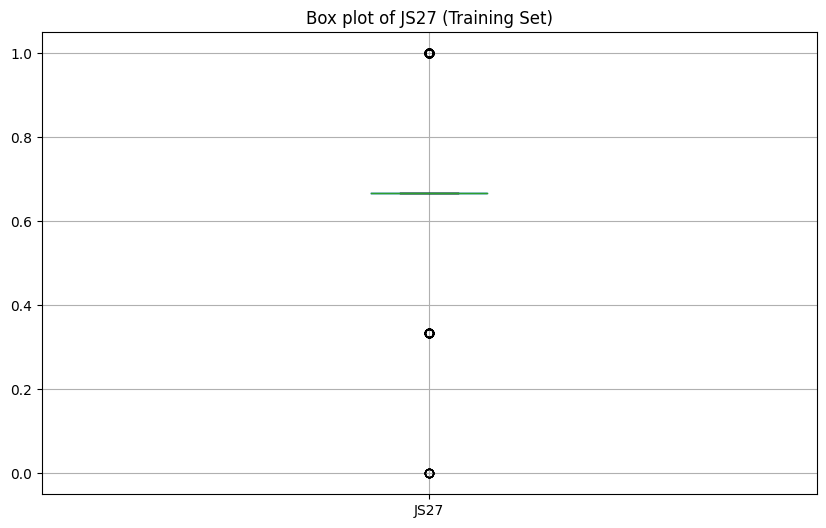

JS28 - Number of Outliers: 30


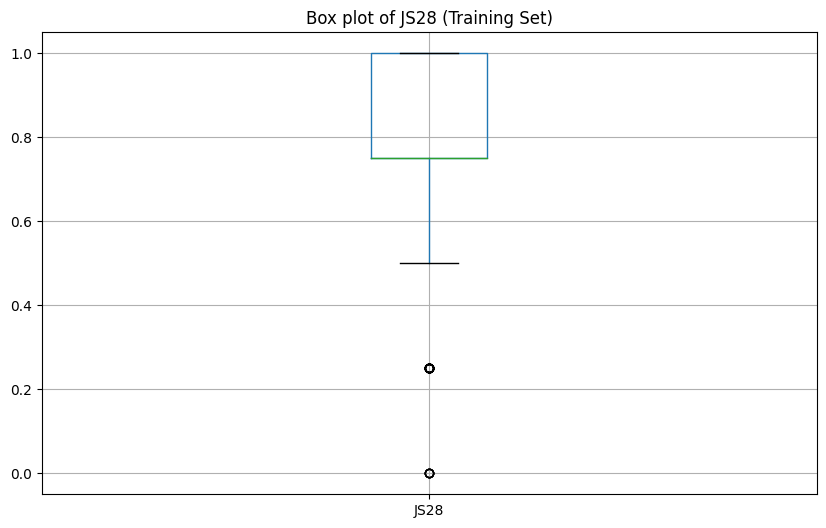

JS29 - Number of Outliers: 28


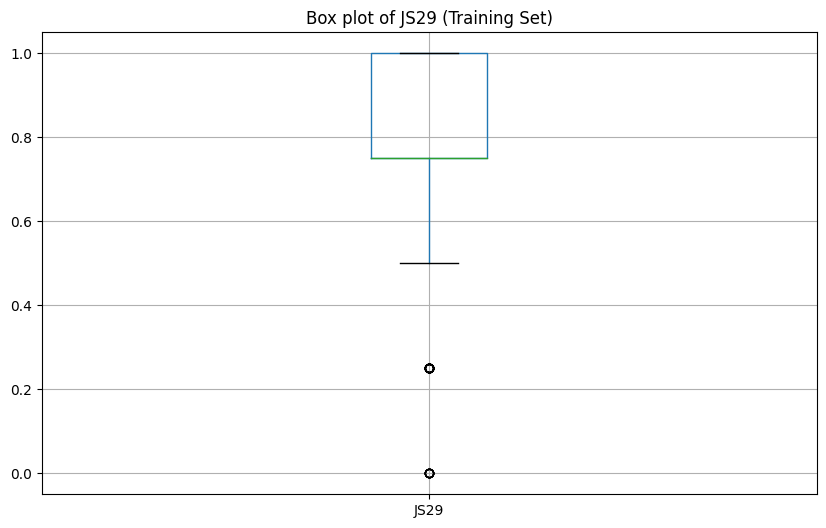

JS30 - Number of Outliers: 5


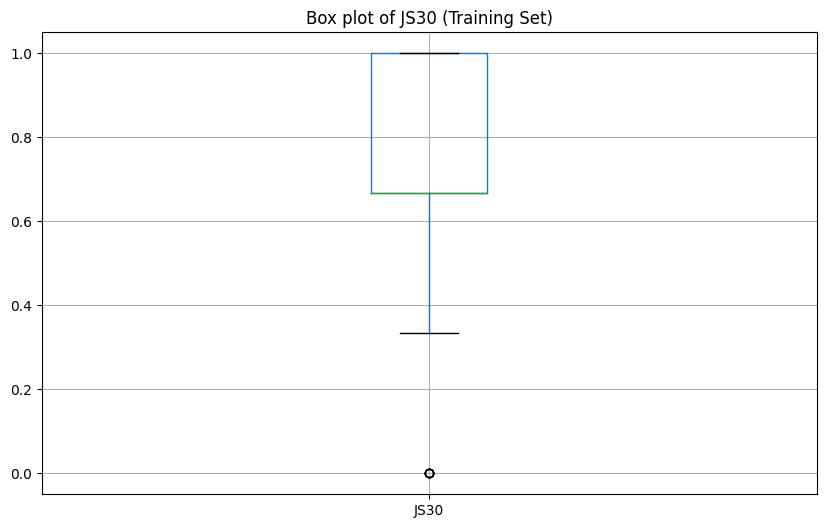

JS31 - Number of Outliers: 5


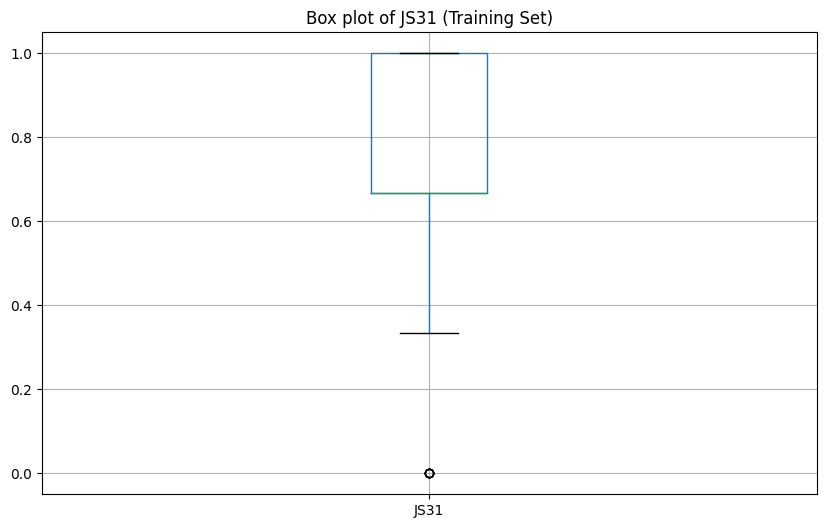

JS32 - Number of Outliers: 11


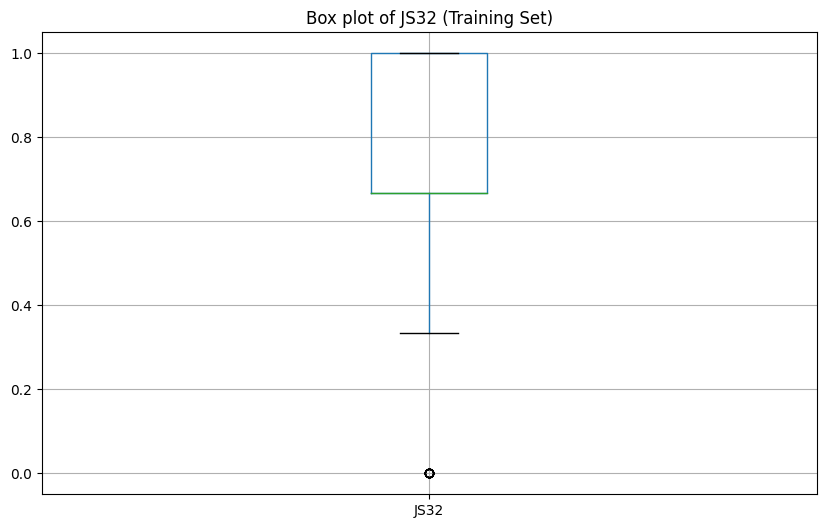

JS33 - Number of Outliers: 48


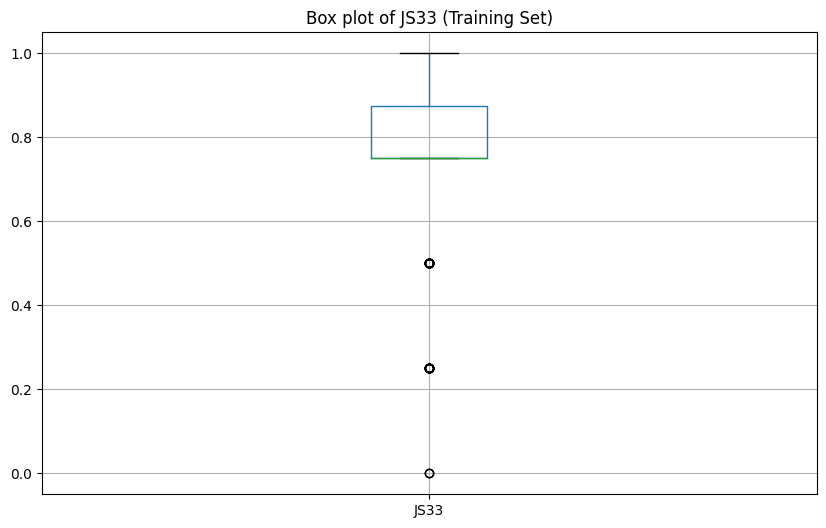

JS34 - Number of Outliers: 24


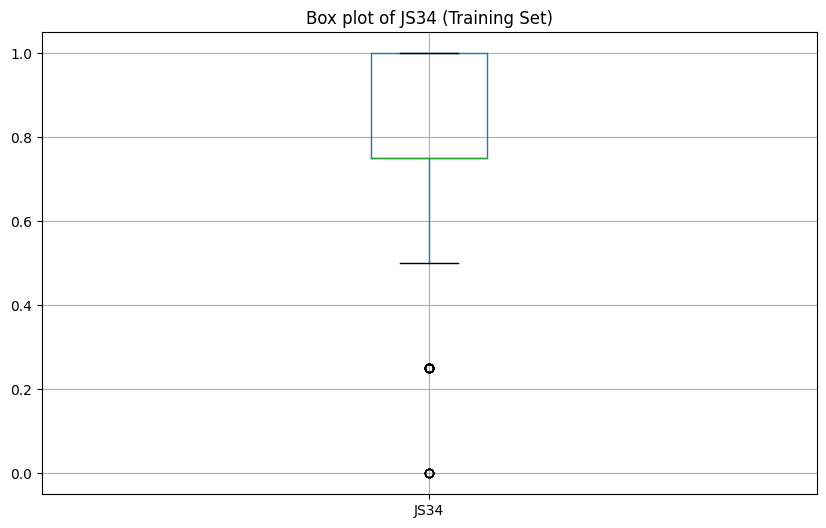

JS35 - Number of Outliers: 4


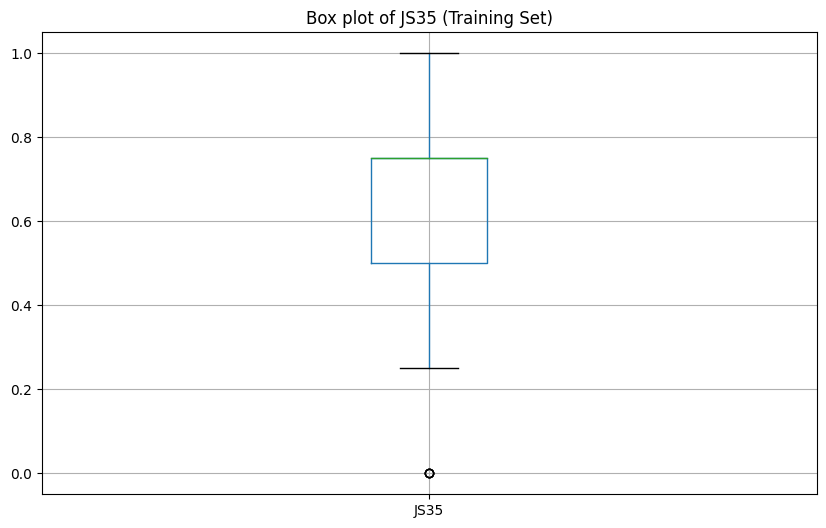

JS36 - Number of Outliers: 5


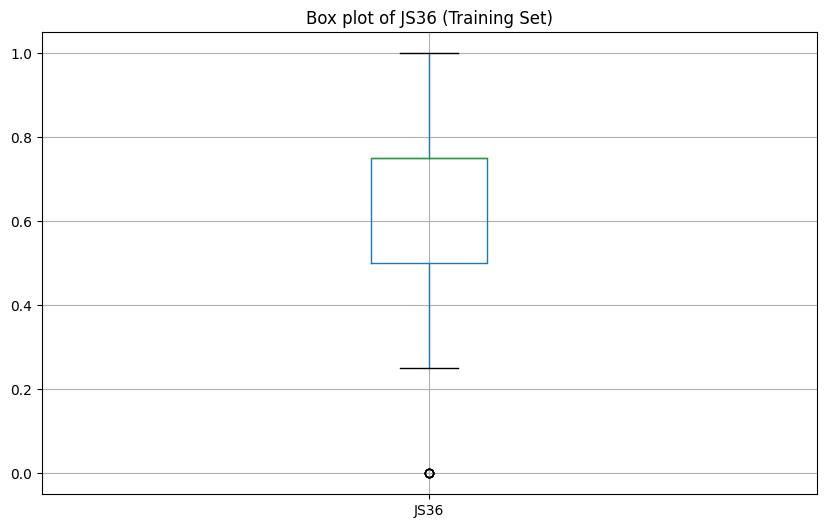

JP1 - Number of Outliers: 7


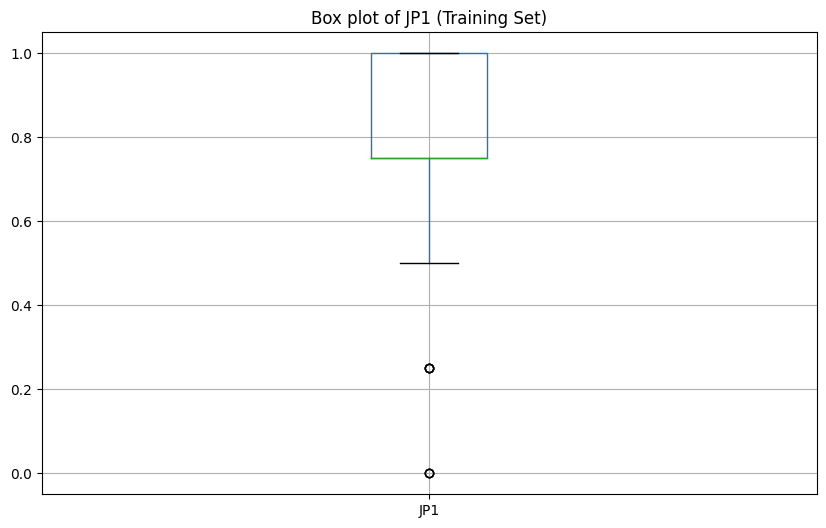

JP2 - Number of Outliers: 6


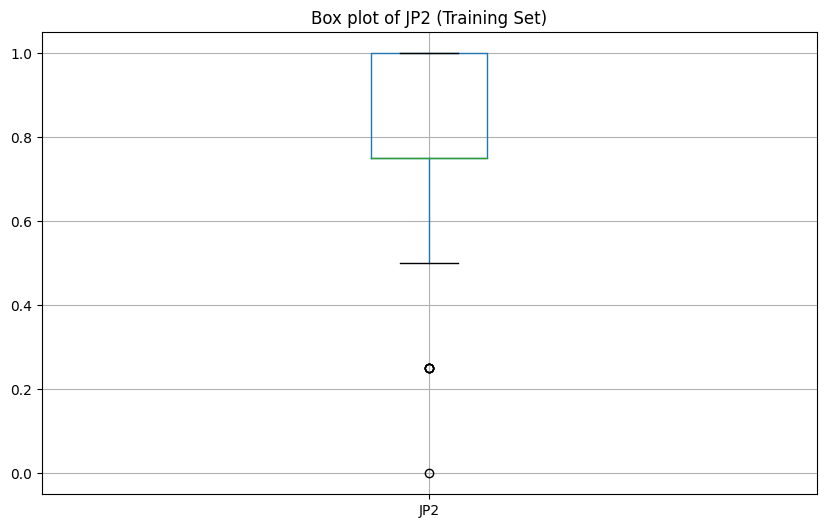

JP3 - Number of Outliers: 16


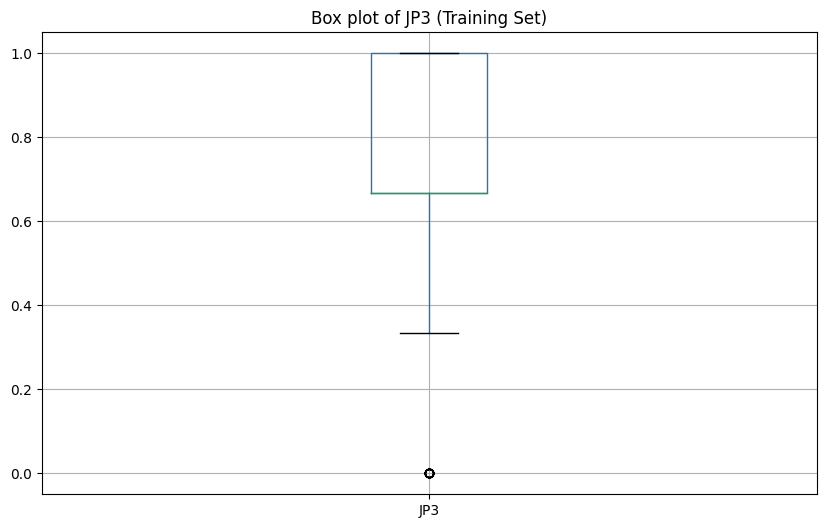

JP4 - Number of Outliers: 25


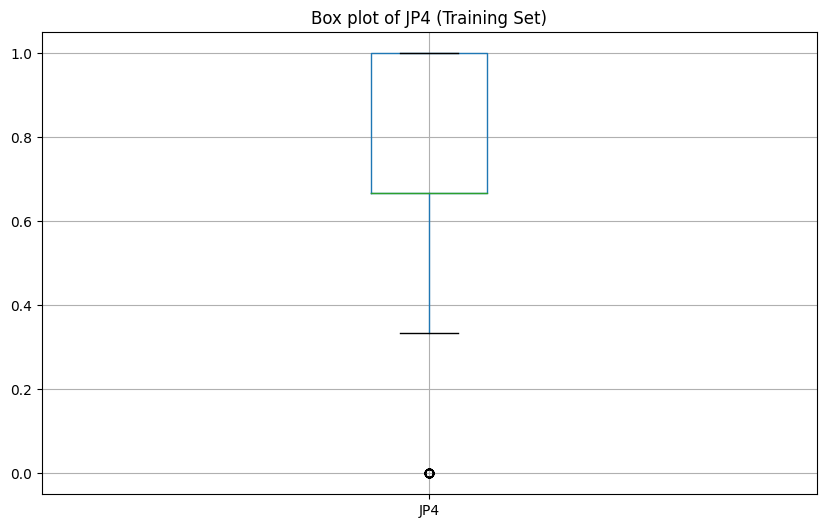

JP5 - Number of Outliers: 12


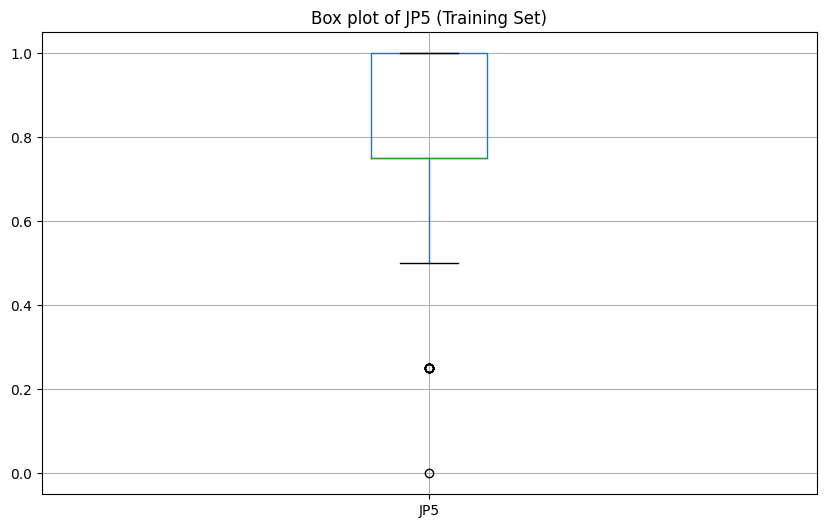

JP6 - Number of Outliers: 3


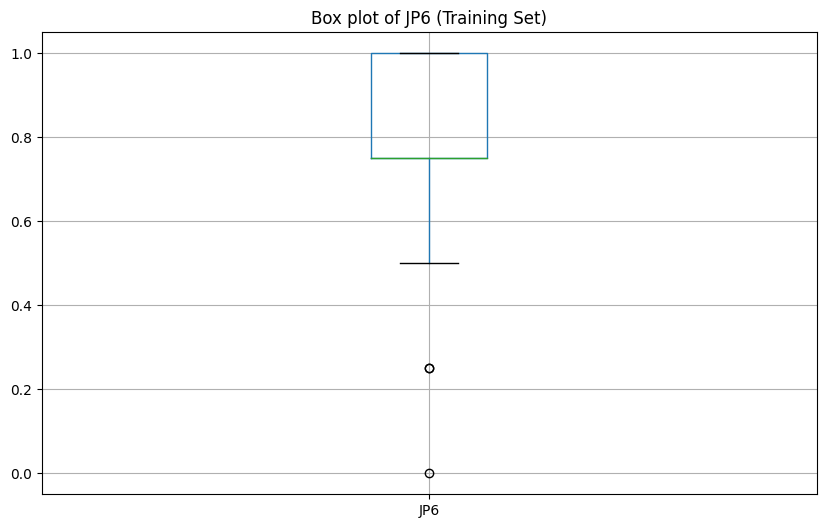

In [ ]:
# Step 2: Detect and handle outliers in the training set
for column in X_train.columns:
    # Calculate IQR
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    print(f"{column} - Number of Outliers: {len(outliers)}")

    # Visualize outliers with a box plot
    plt.figure(figsize=(10, 6))
    X_train.boxplot([column])
    plt.title(f"Box plot of {column} (Training Set)")
    plt.show()

    # Replace outliers with the column mean (excluding outliers)
    mean_value = X_train[(X_train[column] >= lower_bound) & (X_train[column] <= upper_bound)][column].mean()
    X_train.loc[(X_train[column] < lower_bound) | (X_train[column] > upper_bound), column] = mean_value


#Feature Selection

#Zero variance

In [ ]:
X_train.shape

(247, 53)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Store the original column names
original_columns = X_train.columns

# Initialize the VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.0)

# Fit to the training data and transform it
X_train_transformed = sel.fit_transform(X_train)

# Transform the test data
X_test_transformed = sel.transform(X_test)

# Apply the mask to the original columns to keep the column names
selected_columns = original_columns[sel.get_support()]

# Recreate DataFrames with the selected columns
X_train = pd.DataFrame(X_train_transformed, columns=selected_columns)
X_test = pd.DataFrame(X_test_transformed, columns=selected_columns)

print("Shapes after feature selection - X_train:", X_train.shape, ", X_test:", X_test.shape)


Shapes after feature selection - X_train: (247, 47) , X_test: (62, 47)


# ANOVA

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

JS23: 47.20210540876641
JS35: 45.92753717758211
JS36: 45.76715435489275
JS21: 35.413166330132356
JS4: 35.04552972428936
JS17: 33.57817531075869
JS11: 31.953903365305173
JS12: 28.761478555965297
JS10: 27.310910153490862
JS26: 25.84195899759576
JS20: 25.028360818660822
JS18: 24.26410693055538
JS8: 24.257705579828734
JS31: 21.150667808527952
JS30: 20.728502479343174
JS33: 20.590602265228885
JS14: 20.142200930492127
JP6: 19.779541233810768
JS3: 19.568070587253974
JS32: 19.082330933294184
JS25: 18.743684959257394
JS7: 17.201814559579393
JS6: 17.110400376965945
JS16: 15.911822627293505
JS28: 15.796865370566364
JS13: 15.640221389326584
JS24: 14.51175515289386
JS19: 14.361894146935201
JP4: 13.190903624861512
JS29: 13.078164547704194
JS15: 12.308796674389816
JS1: 10.563265799540604
JP5: 10.434828629558863
JP2: 8.940895542226905
JS5: 7.4270696447018105
JP1: 5.4562398138528545
JP3: 4.644547612753649
JS34: 2.9886553128276807
JS22: 2.221266525774032
JS2: 2.021044526145148
Sperm quality: 1.937892353

<ipython-input-22-a7442b56529a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_df[:28], x='F-value', y='Feature', palette='viridis')


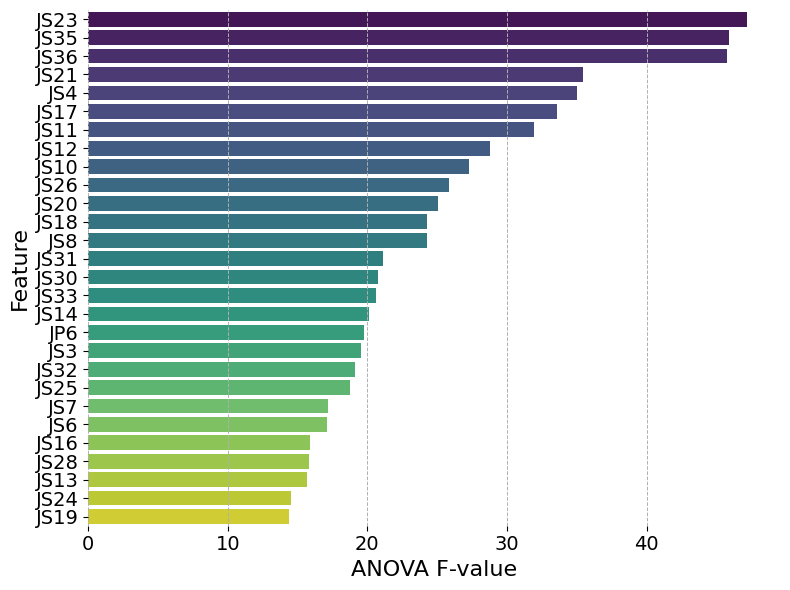

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Select features using ANOVA F-value between label/feature for classification tasks
selector = SelectKBest(score_func=f_classif, k=30)  # Use k='all' to select all features, or set k to desired number

# Fit to train set and transform both training and test sets
selector.fit(X_train, y_train)

# Transform both training and test sets
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Sorting the scores and corresponding feature names in descending order
sorted_indices = selector.scores_.argsort()[::-1]
sorted_scores = selector.scores_[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

# Print the scores with names
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature}: {score}")

# Convert the data into a DataFrame for easy plotting
anova_df = pd.DataFrame({'Feature': sorted_features, 'F-value': sorted_scores})


# Plot the F-values in a horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=anova_df[:28], x='F-value', y='Feature', palette='viridis')
# plt.title('ANOVA F-values for each feature', fontsize=16)
plt.xlabel('ANOVA F-value', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)

# Remove the black box around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('Fig12(b).pdf', format='pdf', dpi=300)
plt.show()



In [ ]:
X_train = X_train_selected

In [ ]:
X_test = X_test_selected

In [ ]:
X_train

array([[0.75      , 0.75      , 0.75      , ..., 0.75      , 0.66666667,
        0.75      ],
       [0.75      , 1.        , 0.75      , ..., 0.75      , 0.66666667,
        1.        ],
       [0.75      , 0.75      , 0.25      , ..., 1.        , 0.66666667,
        1.        ],
       ...,
       [0.75      , 0.75      , 0.25      , ..., 0.75      , 0.66666667,
        0.75      ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.75      , 1.        , 0.75      , ..., 0.25      , 0.66666667,
        1.        ]])

# Model Selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# import numpy as np



# Hyperparameter Optimization - Randomized Search CV

In [ ]:
# Define model hyperparameter spaces
param_distributions = {
    'GaussianNB': {},  # Naive Bayes doesn't have relevant hyperparameters for tuning in this context
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'LGBMClassifier': {
        'num_leaves': [31, 62, 127],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 200, 300]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9]
    },
    'LinearRegression': {},  # Linear Regression typically does not need hyperparameter tuning for most cases
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Instantiate models
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

best_params = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}")
    clf = RandomizedSearchCV(model, param_distributions[model_name], n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_params[model_name] = clf.best_params_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Running RandomizedSearchCV for GaussianNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for GaussianNB: {}
Running RandomizedSearchCV for DecisionTreeClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Running RandomizedSearchCV for RandomForestClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Running RandomizedSearchCV for AdaBoostClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for AdaBoostClassifier: {'n_estimators': 150, 'learning_rate': 0.1}
Running RandomizedSearchCV for LGBMClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 157, number of negative: 90
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635628 -> initscore=0.556436
[LightGBM] [Info] Start training from score 0.556436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for LogisticRegression: {'solver': 'lbfgs', 'C': 0.08858667904100823}
Running RandomizedSearchCV for SVC
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVC: {'kernel': 'linear', 'C': 1}
Running RandomizedSearchCV for KNeighborsClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNeighborsClassifier: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'}


# Model Training and Evaluation

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0     0.6364    0.6087    0.6222        23
           1     0.7750    0.7949    0.7848        39

    accuracy                         0.7258        62
   macro avg     0.7057    0.7018    0.7035        62
weighted avg     0.7236    0.7258    0.7245        62



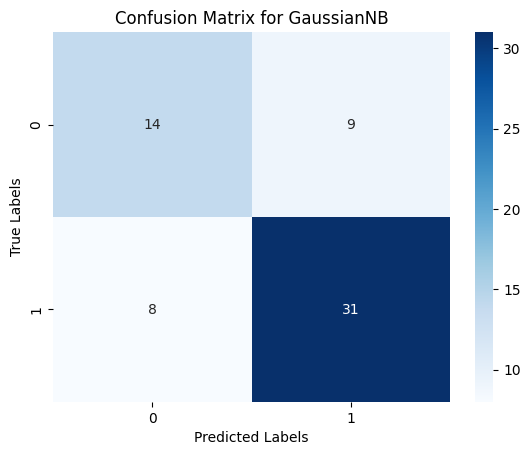

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0     0.6842    0.5652    0.6190        23
           1     0.7674    0.8462    0.8049        39

    accuracy                         0.7419        62
   macro avg     0.7258    0.7057    0.7120        62
weighted avg     0.7366    0.7419    0.7359        62



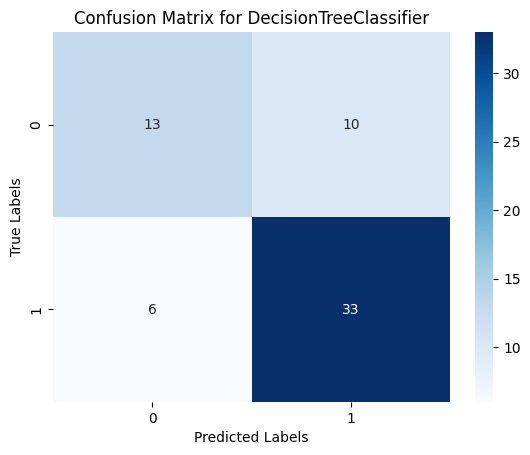

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0     0.8889    0.6957    0.7805        23
           1     0.8409    0.9487    0.8916        39

    accuracy                         0.8548        62
   macro avg     0.8649    0.8222    0.8360        62
weighted avg     0.8587    0.8548    0.8504        62



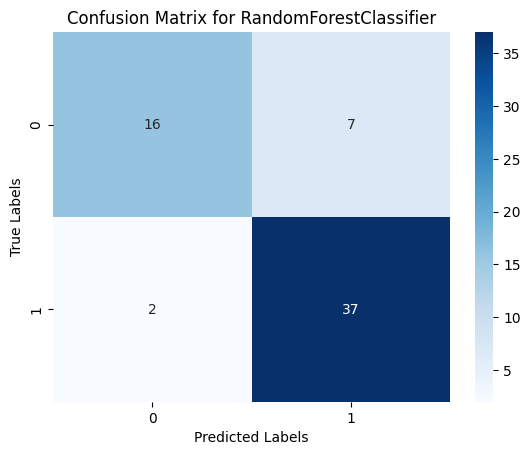

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0     0.8571    0.7826    0.8182        23
           1     0.8780    0.9231    0.9000        39

    accuracy                         0.8710        62
   macro avg     0.8676    0.8528    0.8591        62
weighted avg     0.8703    0.8710    0.8696        62



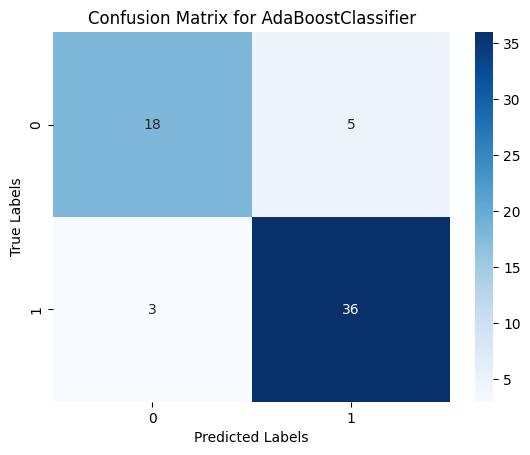

[LightGBM] [Info] Number of positive: 157, number of negative: 90
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635628 -> initscore=0.556436
[LightGBM] [Info] Start training from score 0.556436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

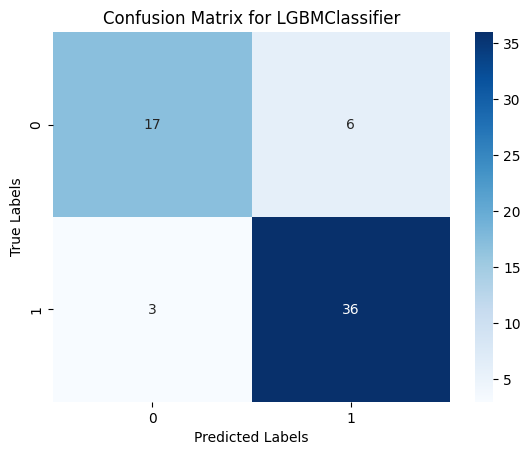

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0     0.7727    0.7391    0.7556        23
           1     0.8500    0.8718    0.8608        39

    accuracy                         0.8226        62
   macro avg     0.8114    0.8055    0.8082        62
weighted avg     0.8213    0.8226    0.8217        62



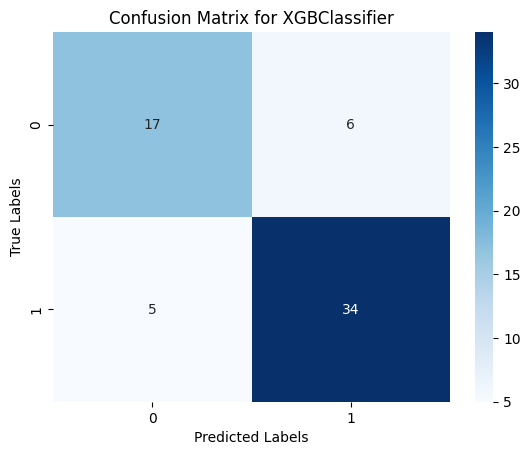

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0     0.9375    0.6522    0.7692        23
           1     0.8261    0.9744    0.8941        39

    accuracy                         0.8548        62
   macro avg     0.8818    0.8133    0.8317        62
weighted avg     0.8674    0.8548    0.8478        62



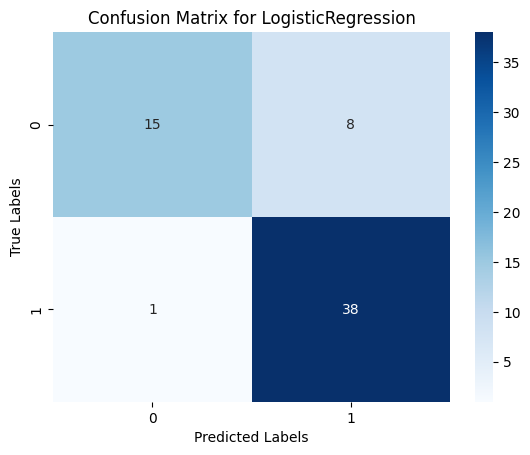

Classification Report for SVC:
              precision    recall  f1-score   support

           0     0.8500    0.7391    0.7907        23
           1     0.8571    0.9231    0.8889        39

    accuracy                         0.8548        62
   macro avg     0.8536    0.8311    0.8398        62
weighted avg     0.8545    0.8548    0.8525        62



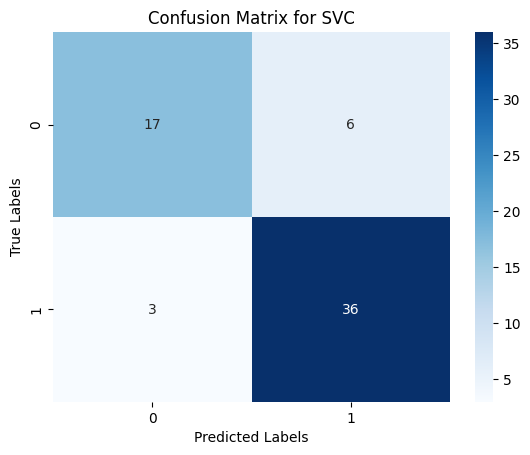

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0     0.8667    0.5652    0.6842        23
           1     0.7872    0.9487    0.8605        39

    accuracy                         0.8065        62
   macro avg     0.8270    0.7570    0.7723        62
weighted avg     0.8167    0.8065    0.7951        62



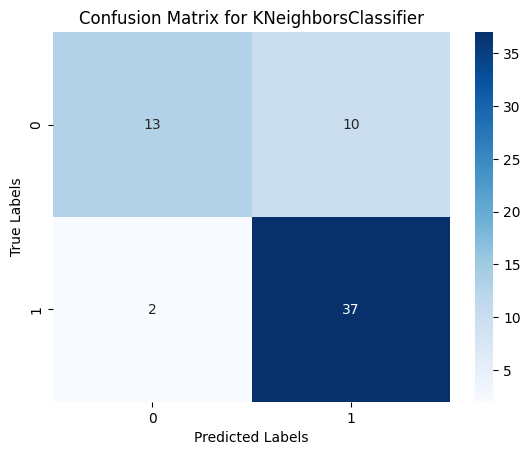

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

for model_name, model in models.items():
    # Skip LinearRegression for confusion matrix and classification report
    if model_name == 'LinearRegression':
        continue

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    optimized_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = optimized_model.predict(X_test)

    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, digits = 4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Ensemble Model Creation (Later)

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



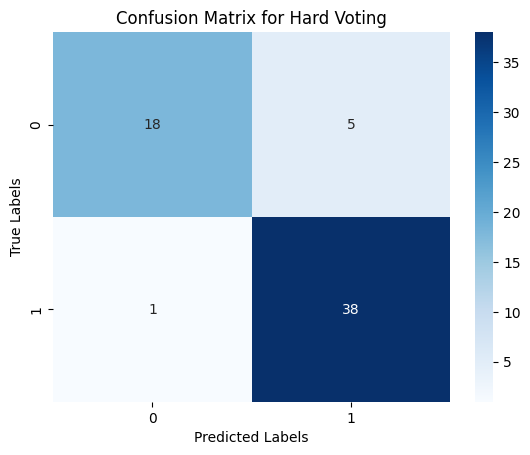


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



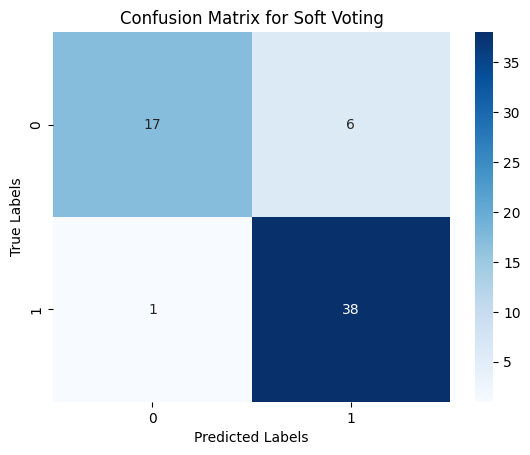

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
lgbm_best = LGBMClassifier(**best_params['LGBMClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('ada', ada_best),
        # ('lgbm', lgbm_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('ada', ada_best),
        # ('lgbm', lgbm_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits = 4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Model Interpretation (Explainable AI) (Later)

# Model Deployment

# Ablation Study